**Pengantar**

Suatu pagi kamu terbangun dari tidur dan mendapati ada sebuah e-mail masuk dari e-commerce idaman kamu. Kamu tau bahwa ini bukan sekedar email promosi biasa karena satu minggu lalu kamu baru saja menyelesaikan proses akhir rekruitment di perusahaan tersebut.

"SELAMAT BERGABUNG BERSAMA KAMI", sebuah kalimat yang memiliki arti mendalam setelah kamu berusaha mengejar cita-cita kamu untuk menjadi data scientist. Hingga akhirnya cita-cita kamu tercapai.

Hari pertama pun tiba, kamu menyelesaikan orientasi dan akhirnya bertemu dengan tim data scientist di perusahaan tersebut. Kamu mulai beradaptasi dan segera mendapatkan tugas pertama kamu sebagai seorang junior data scientist.

Perusahaan kamu sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan kamu dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan. Kamu di diberikan tugas agar dapat memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.

Kamu teringat bahwa beberapa bulan sebelumnya kamu pernah belajar menghadapi permasalahan serupa di tempat kamu belajar. Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes.  Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.

Data yang digunakan memiliki entri-entri sebagai berikut:
1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
4. Umur: Umur dari pelanggan dalam format angka
5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
7. Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

In [1]:
!pip install kmodes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

In [2]:
# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [3]:
# Melihat informasi data
df.info()
# Tips: Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


**Eksplorasi data** - menyiapkan data dan melihat informasi dasar dari data yang kamu miliki. Lakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan.Lakukan juga eksplorasi untuk data numerik dan juga data kategorikal.

In [ ]:
# Eksplorasi data numerik
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

/tmp/ipykernel_35/1295491670.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_35/1295491670.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

/tmp/ipykernel_35/3224868535.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/3224868535.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

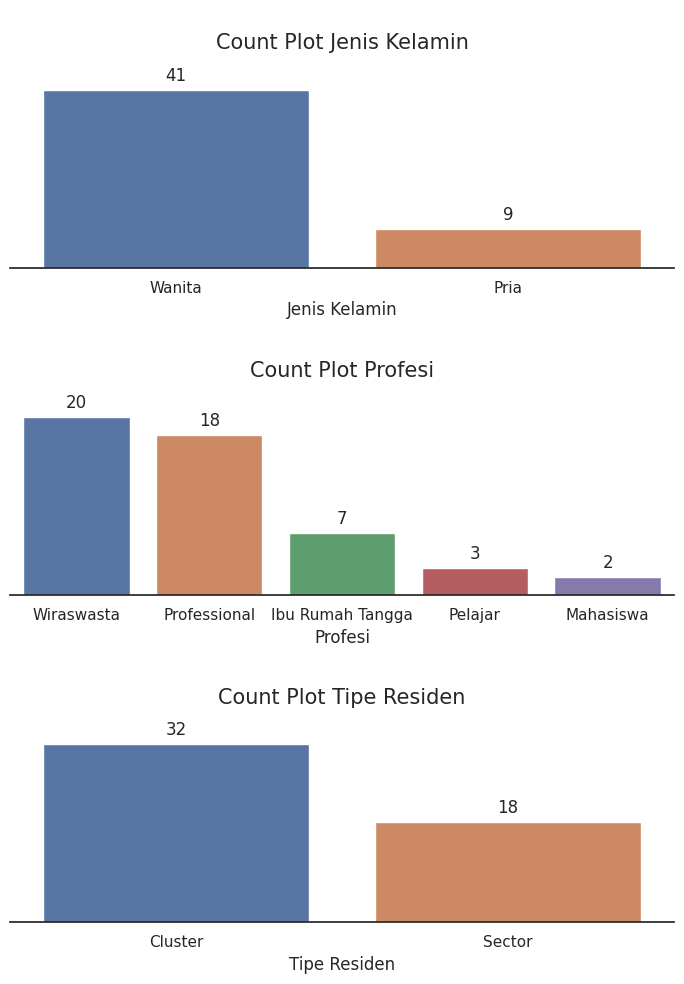

In [7]:
# Eksplorasi data kategorikal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot
    sns.countplot(x=kol, data=df, order=df[kol].value_counts().index, ax=axs[i])
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points')

    # Setting Plot
    sns.despine(right=True,top = True, left = True)
    axs[i].axes.yaxis.set_visible(False)
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

***Mempersiapkan data sebelum pemodelan***

In [8]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import StandardScaler

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# Daftar kolom yang berisi data kategorikal
categorical_columns = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Duplikasi data hanya untuk kolom kategorikal
encoded_data = df[categorical_columns].copy()

# Proses label encoding pada setiap kolom kategorikal
encoder = LabelEncoder()
for feature in categorical_columns:
    encoded_data[feature] = encoder.fit(df[feature]).transform(df[feature])

# Tampilkan 5 baris pertama dari hasil encoding
print(encoded_data.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [11]:
# Menggabungkan dataframe
df_model = encoded_data.merge(df_std, left_index=True, right_index=True, how='left')

# Menampilkan 5 baris pertama
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


**Tips:**

-Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist.

-Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan.

-Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.

**Pemodelan**

*Clustering* adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain. Terdapat beberapa algoritma untuk melakukan *clustering* ini. Salah satu yang populer adalah *k-means*.

*K-means* itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan *k-modes*.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa dilakukan dengan menggunakan library *k-modes* yang didalamnya terdapat modul kprototype. Untuk menggunakan algoritma *kprototype* kamu perlu memasukkan jumlah *cluster* yang dikehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


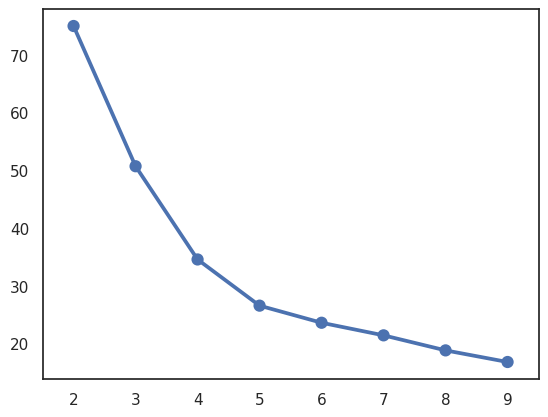

In [13]:
# Mencari jumlah cluster yang optimal
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Membaca dataset
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2, 10):  
    kproto = KPrototypes(n_clusters=k, random_state=75)  
    kproto.fit_predict(df_model, categorical=[0, 1, 2])  
    cost[k] = kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

In [19]:
# Membuat model
import pickle
from kmodes.kprototypes import KPrototypes

# Inisialisasi dan training model
model = KPrototypes(n_clusters=5, random_state=75).fit(df_model, categorical=[0, 1, 2])

# Simpan model ke file
with open('cluster.pkl', 'wb') as file:
    pickle.dump(model, file)

In [22]:
# Menggunakan model
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters    
print(df_final.head())

segmen pelanggan: [3 1 2 2 0 4 3 2 4 4 2 2 3 3 0 4 4 2 0 1 0 2 4 0 0 2 0 4 2 2 1 3 1 0 4 0 4
 3 4 1 4 0 4 0 4 0 2 3 4 3]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        3  
1      Cluster              2722700        1  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        0  


In [24]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range(0, 5):
	print('\nPelanggan cluster: {}\n'.format(i))
	print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

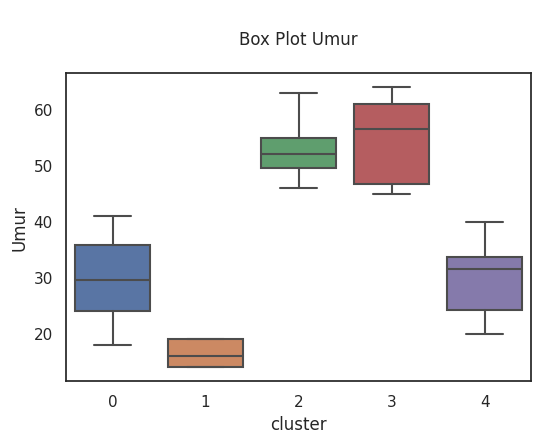

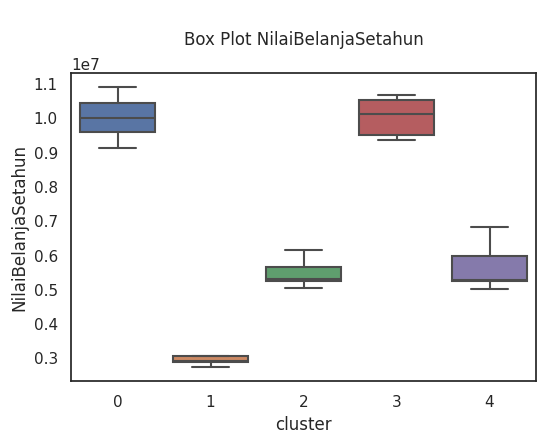

In [26]:
# Visualisasi hasil clustering - box plot
import matplotlib.pyplot as plt

# Data Numerical
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

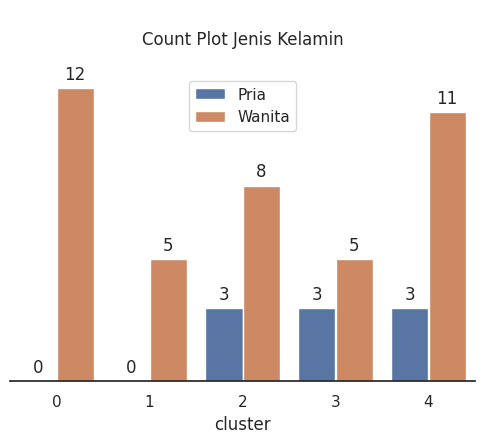

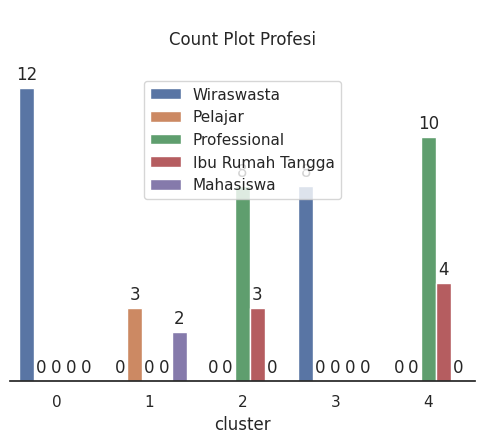

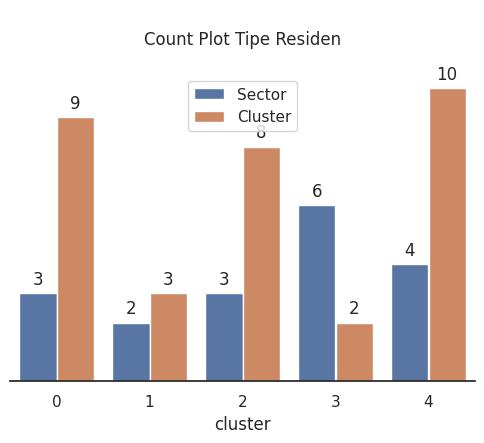

In [28]:
# Visualisasi hasil clustering - box plot
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

In [29]:
# Penamaan cluster
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.4+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:

* **Cluster 0**: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
* **Cluster 1**: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
* **Cluster 2**: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
* **Cluster 3**: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
* **Cluster 4**: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

**Tips:**
* Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score. Untuk detailnya bisa dilihat di dokumentasi sklearn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).
* Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan modelnya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.
* Tantangan lainnya adalah jumlah data yang jauh lebih banyak dibanding dengan dataset yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan modelnya akan menjadi lebih lama.



**Mengoperasikan Model**